In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.ticker as ticker
import numpy as np
from functools import partial
import os

In [2]:
def get_squad_GCA_SCA():
    url = "https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F9%2Fgca%2FPremier-League-Stats&div=div_stats_squads_gca_for"
    df = pd.read_html(url)[0]
    df = df.droplevel(0, axis=1)
#     df = df.query('Player != "Player"')
    df = df.apply(partial(pd.to_numeric, errors='ignore'))
    df = df[["Squad", "GCA90", "SCA90"]]
    return df

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.65)

In [3]:
plot_df = get_squad_GCA_SCA()

In [4]:
# plt.style.use('fivethirtyeight') 

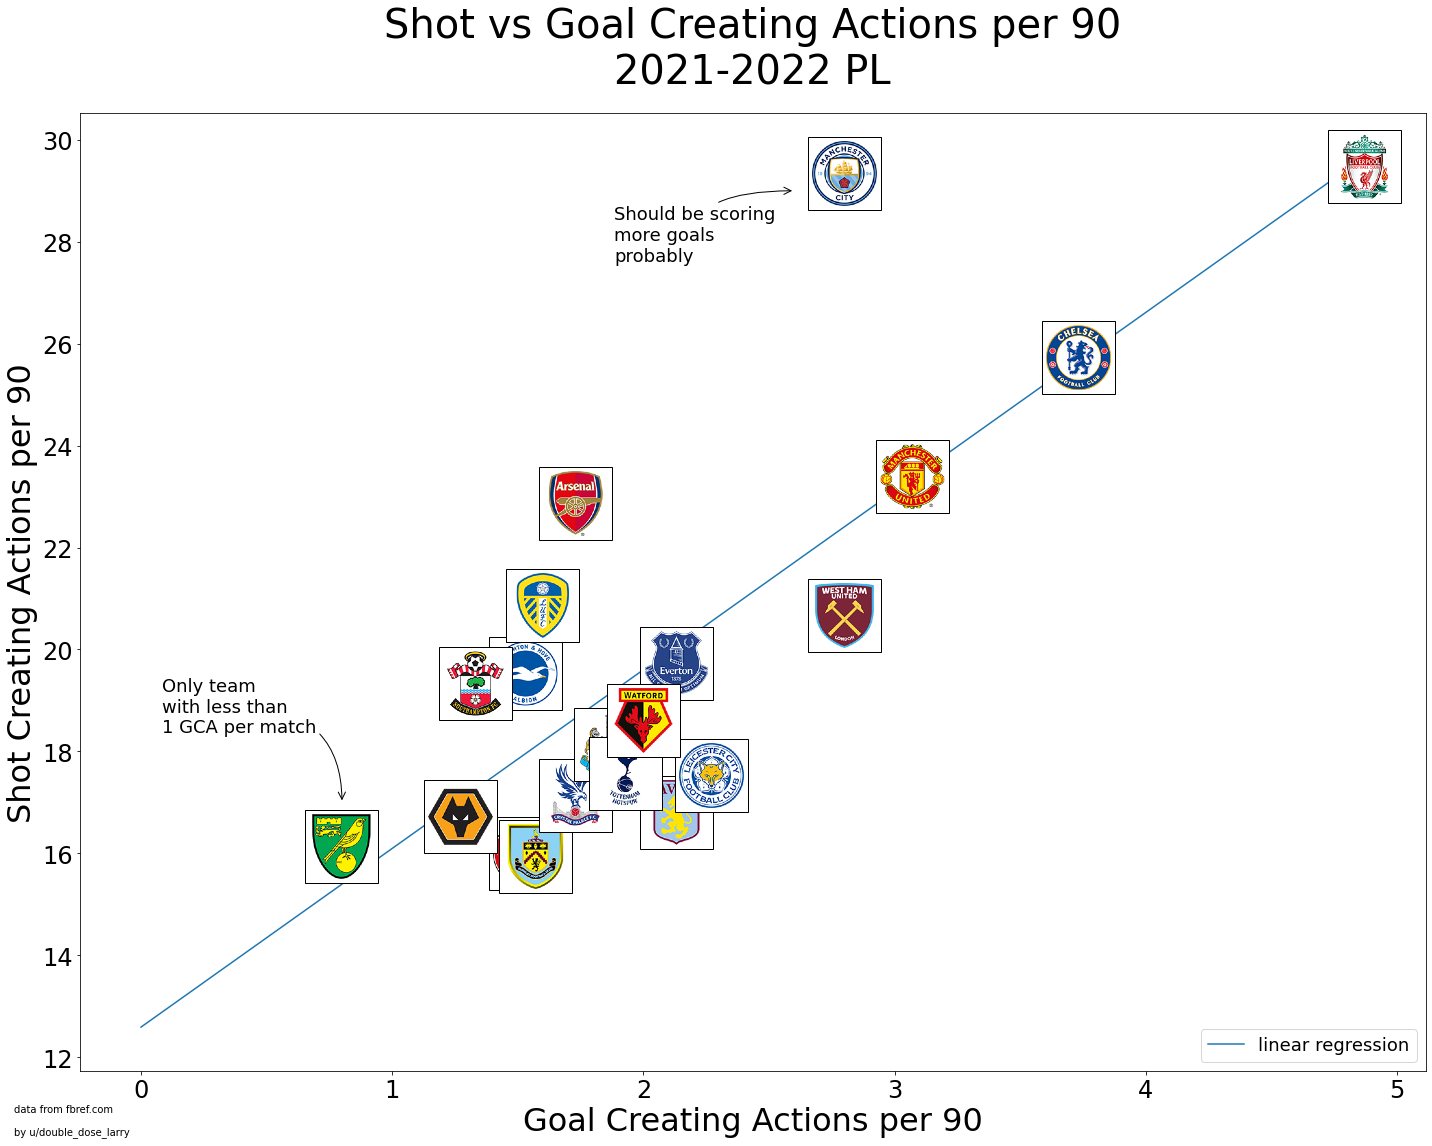

In [13]:
f, ax = plt.subplots(figsize=(20,16))

x = plot_df["GCA90"]
y = plot_df["SCA90"]

ax.scatter(x,y)

m, b = np.polyfit(x, y, 1)
x_linspace = np.linspace(0, x.max(), 100)
plt.plot(x_linspace, m*x_linspace+b, label="linear regression")


#plot faces
imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'squad_pngs/{tm.Squad}.png'),
                      (tm.GCA90, tm.SCA90)
#                        frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

# annotate Manchester City
ax.annotate(
    "Should be scoring\nmore goals\nprobably",
    (2.6, 29),
    size=18,
    xytext = (-180, -70),
    textcoords="offset pixels",
    arrowprops=dict(
            arrowstyle="->",
            connectionstyle="angle3,angleA=90,angleB=0"
        )
)

# annotate Manchester City
ax.annotate(
    "Only team\nwith less than\n1 GCA per match",
    (0.8, 17),
    size=18,
    xytext = (-180, 70),
    textcoords="offset pixels",
    arrowprops=dict(
            arrowstyle="->",
            connectionstyle="angle3,angleA=0,angleB=90"
        )
)

# axis labels and stuff
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.set_yticks(range(12,31,2))
plt.ylabel("Shot Creating Actions per 90", size=32)
plt.xlabel("Goal Creating Actions per 90", size=32)

# rest of the plot
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
plt.legend(loc="lower right", prop={'size': 18})
plt.title("Shot vs Goal Creating Actions per 90\n2021-2022 PL", size=40, pad=30)
plt.tight_layout()
plt.annotate("by u/double_dose_larry", (.01,.01), xycoords='figure fraction')
plt.annotate("data from fbref.com", (.01,.03), xycoords='figure fraction')
plt.savefig("gca_sca.png")
